In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import lavaburst

/home/dmitry/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Example usage of some callers

In [2]:
import TADcalling
TADcalling.logger.setLevel('INFO')

In [3]:
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [4]:
IS.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [5]:
DI = TADcalling.CallerClasses.DirectionalityCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [6]:
DI.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [3]:
lc = TADcalling.CallerClasses.LavaburstCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [4]:
lc.call({'gamma':np.arange(-5,6,0.1), 'method':['armatus', 'modularity']})

In [5]:
acpp = TADcalling.CallerClasses.ArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [6]:
acpp.call({'gamma':[i / 10 for i in range(-10, 11)]}, caller_path='armatus')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt.gz
INFO:TADcalling:gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stdout: b''
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stderr: b'gzip: ../data/S2.20000.chr2L.txt.gz already exists;\tnot overwritten\n'
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 107645\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=-1\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 107645\nDomain ensemble size: 1\nWriting consensus domains to: buff.cons

INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=0.2\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 408.906\nDomain ensemble size: 1\nWriting consensus domains to: buff.consensus.txt\n'
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 380.409\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=0.3\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 380.409\nDomain ensemble size: 1\nWriting consensus domains to: buff.consensus.txt\n'
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.t

In [7]:
df_acpp = acpp.segmentation2df()

gamma -0.9
gamma -0.8
gamma 0.0
gamma -0.1
gamma -0.6
gamma -0.2
gamma -1.0
gamma -0.7
gamma -0.3
gamma -0.4
gamma -0.5


In [8]:
df_lc = lc.segmentation2df()

gamma -3.300000000000006
method modularity
gamma -2.500000000000009
method modularity
gamma 5.199999999999964
method modularity
gamma -2.3000000000000096
method armatus
gamma -0.3000000000000167
method armatus
gamma -1.4000000000000128
method armatus
gamma -1.0000000000000142
method modularity
gamma -4.9
method modularity
gamma 3.699999999999969
method modularity
gamma -0.10000000000001741
method modularity
gamma -1.4000000000000128
method modularity
gamma 1.499999999999977
method armatus
gamma 0.09999999999998188
method modularity
gamma -2.1000000000000103
method modularity
gamma -0.7000000000000153
method modularity
gamma -3.1000000000000068
method modularity
gamma 2.4999999999999734
method modularity
gamma 3.39999999999997
method modularity
gamma 1.9999999999999751
method modularity
gamma 0.49999999999998046
method modularity
gamma -0.3000000000000167
method modularity
gamma -4.700000000000001
method armatus
gamma 1.0999999999999783
method modularity
gamma 1.8999999999999755
method 

In [27]:
df_acpp.head()

,bgn,caller,end,gamma,label
0,0,Armatus,727,-0.9,S2
1,755,Armatus,760,-0.9,S2
2,772,Armatus,776,-0.9,S2
3,816,Armatus,836,-0.9,S2
4,906,Armatus,1050,-0.9,S2


In [22]:
armatus_mask = df_lc.loc[:, 'method'] == 'armatus'

In [26]:
df = pd.concat([df_lc[armatus_mask], df_acpp])

In [38]:
df.head()

,bgn,caller,end,gamma,label,method,length
0,0,Lavaburst,17,-2.3,S2,armatus,17
1,18,Lavaburst,660,-2.3,S2,armatus,642
2,664,Lavaburst,711,-2.3,S2,armatus,47
3,711,Lavaburst,820,-2.3,S2,armatus,109
4,820,Lavaburst,1151,-2.3,S2,armatus,331


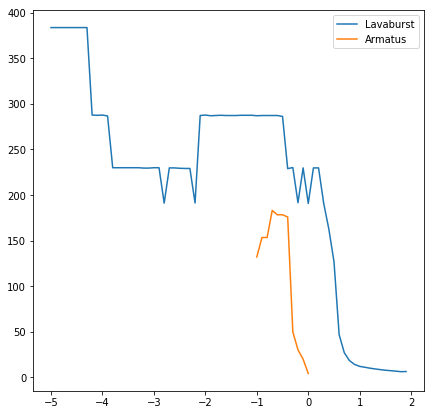

In [37]:
df.loc[:,'length'] = df.end-df.bgn
gr = df.groupby(['gamma', 'caller']).mean().reset_index().sort_values(['caller', 'gamma'])
plt.figure(figsize=[7,7])
for caller in ['Lavaburst', 'Armatus']:
    tmp = gr.query('caller=="{}"'.format(caller))
    plt.plot( tmp.gamma, tmp.length, label=caller)
    
plt.legend()

In [12]:
df_lc = lc.segmentation2df()
df_is = IS.segmentation2df()
df_di = DI.segmentation2df()

df = pd.concat([x.segmentation2df() for x in [lc, IS, DI]])

In [10]:
df[0:5]

,bgn,caller,end,gamma,label,method
0,0,Lavaburst,1151,-3.3,S2,modularity
0,0,Lavaburst,1151,-2.5,S2,modularity
0,0,Lavaburst,15,5.2,S2,modularity
1,21,Lavaburst,28,5.2,S2,modularity
2,28,Lavaburst,43,5.2,S2,modularity


In [25]:
df.loc[:,'length'] = df.end-df.bgn

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


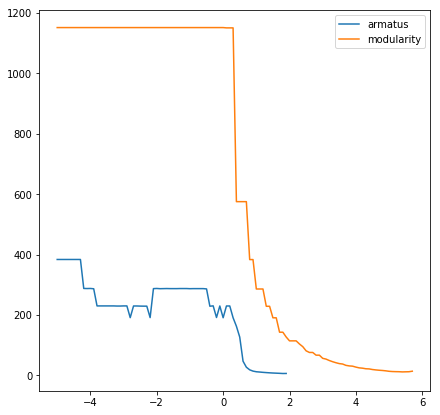

In [12]:
gr = df.query('caller=="Lavaburst"').groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
plt.figure(figsize=[7,7])
for method in ['armatus', 'modularity']:
    tmp = gr.query('method=="{}"'.format(method))
    plt.plot( tmp.gamma, tmp.length, label=method )
    
plt.legend()

In [21]:
hc = TADcalling.CallerClasses.HiCsegCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [22]:
hc.call(params_dict={'distr_model':["P"]}, tune=True)

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt
INFO:TADcalling:Rscript hicseg_script.R
INFO:TADcalling:Check stdout: b''


In [23]:
df_hc = hc.segmentation2df()

In [6]:
lc.convert_files("txt.gz")

In [18]:
lc._metadata

{'assembly': 'dm3',
 'balance': False,
 'chr': 'chr2L',
 'data_formats': ['cool', 'txt.gz', 'txt.gz'],
 'files_cool': ['./data/S2.20000.cool'],
 'files_txt.gz': ['./data/S2.20000.chr2L.txt.gz'],
 'labels': ['S2'],
 'resolution': 1000,
 'size': 0}

### DEVELOPMENT OF MrTADFinder

In [3]:
mrc = TADcalling.CallerClasses.MrTADFinderCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
mrc._metadata

{'assembly': 'dm3',
 'balance': True,
 'chr': 'chr2L',
 'data_formats': ['cool', 'mr_sparse'],
 'files_cool': ['../data/S2.20000.cool'],
 'files_mr_sparse': ['../data/S2.20000.chr2L.sparse.txt'],
 'labels': ['S2'],
 'method': 'Base',
 'params': ['params'],
 'resolution': 20000,
 'size': 0}

In [4]:
mrc.call(1, caller_path='../../MrTADFinder/run_MrTADFinder.jl')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to mr_sparse
INFO:TADcalling:julia ../../MrTADFinder/run_MrTADFinder.jl ../data/S2.20000.chr2L.mr_sparse.txt ../data/S2.20000.chr2L.genome_bin.txt ../data/S2.20000.chr2L.all_bins.txt res=20000 1 buff_mrtadfinder.txt
INFO:TADcalling:Check stdout: b'reading binning information\nreading contact map\nestimating the null model\n398.3238427492396\n229.27585114370873\n142.36827101337013\n88.71300427935282\n58.39096542067618\n38.57713413983011\n26.35065661061504\n18.07528065734837\n12.62906744004556\n8.79511025237405\n6.1510435625324416\n4.295955370547412\n3.0066273050968713\n2.1030581237775223\n1.472783214460475\n1.0314987152252546\n0.7229065817728486\n0.5066416804314664\n0.35517350369225326\n0.24899976863201537\n0.17459562212552057\n0.12243065205879244\n0.0858608573350988\n0.06021696197657942\n0.04223382614474887\n0.029621239714066744\n0.020775651860515408\n0.014574744628451989\n0.01022547391153968\n0.007174496798614624\n0.0050

FileNotFoundError: File b'buff_mrtadfinder.txt' does not exist

In [3]:
c = cooler.Cooler('./data/S2.20000.cool')

In [4]:
sparse = c.matrix(balance=True, as_pixels=True).fetch('chr2L')

In [5]:
sparse.loc[:, "bin1_id":"bin2_id"] += 1

In [6]:
sparse

,bin1_id,bin2_id,count,balanced
0,1,1,2859,0.892852
1,1,2,382,0.117808
2,1,3,315,0.076218
3,1,4,251,0.051895
4,1,5,109,0.026401
5,1,6,61,0.018097
6,1,7,53,0.019344
7,1,8,39,0.013315
8,1,9,16,0.005216
9,1,10,34,0.009732


In [7]:
sparse.loc[:, 'bin1_id':'count'].to_csv('test_sparse.txt', header=False, index=False, sep='\t')

In [61]:
max_bin = sparse.loc[:, 'bin1_id':'bin2_id'].max().max()

In [77]:
with open("genome_bin.txt", 'w') as outfile:
    outfile.write("1\tchr1\t0\t{}".format(max_bin - 1))

In [79]:
max_bin

1151

In [80]:
with open('chr_bin.txt', 'w') as outfile:
    for i in range(max_bin):
        outfile.write("0\t{}\t{}\n".format(i * 20000 + 1, (i + 1) * 20000))

In [12]:
subprocess.run("julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt", shell=True)

CompletedProcess(args='julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt', returncode=1)

In [13]:
mr_df = pd.read_csv('test_mrtadfinder.csv')

In [17]:
mr_df.loc[:, "domain_st_bin":"domain_ed_bin"].values

array([[42015, 42018],
       [42019, 42035],
       [42036, 42041],
       [42042, 42042],
       [42043, 42043],
       [42044, 42044],
       [42045, 42045],
       [42046, 42046],
       [42047, 42047]])

### Format conversions test


In [15]:
import TADcalling
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [ ]:
IS.convert_files('hic', juicer_path='../juicer_tools.1.8.9_jcuda.0.8.jar', remove_intermediary_files=False)

In [ ]:
IS.convert_files('h5')